### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set() #to set theme i.e. prefrredinterface

from pandas.plotting import scatter_matrix #pair plots

from sklearn.preprocessing import StandardScaler #reoves the mean and scale to 
#unit variance

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### READING THE DATASET

In [3]:
diabetes_df=pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EXPLORATORY DATA ANALYSIS

In [4]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1524 non-null   int64  
 1   Glucose                   1524 non-null   int64  
 2   BloodPressure             1524 non-null   int64  
 3   SkinThickness             1524 non-null   int64  
 4   Insulin                   1524 non-null   int64  
 5   BMI                       1524 non-null   float64
 6   DiabetesPedigreeFunction  1524 non-null   float64
 7   Age                       1524 non-null   int64  
 8   Outcome                   1524 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 107.3 KB


In [6]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000
mean,3.187008,110.800525,66.351050,35.361549,252.511811,33.262995,1.482786,42.248688,0.427165
std,3.190360,47.359020,28.598876,27.476078,261.060221,14.835835,1.211113,17.246861,0.494829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,84.000000,54.000000,15.000000,5.000000,24.782500,0.369500,27.000000,0.000000
50%,2.000000,112.000000,70.000000,30.000000,154.500000,32.500000,1.101750,39.000000,0.000000
75%,5.000000,146.000000,84.000000,53.000000,453.000000,41.191975,2.483250,56.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.941200,3.997200,81.000000,1.000000


In [7]:
#Dataset with Transpose

diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1524.0,3.187008,3.190360,0.000,1.0000,2.00000,5.000000,17.0000
Glucose,1524.0,110.800525,47.359020,0.000,84.0000,112.00000,146.000000,199.0000
BloodPressure,1524.0,66.351050,28.598876,0.000,54.0000,70.00000,84.000000,122.0000
SkinThickness,1524.0,35.361549,27.476078,0.000,15.0000,30.00000,53.000000,99.0000
Insulin,1524.0,252.511811,261.060221,0.000,5.0000,154.50000,453.000000,846.0000
BMI,1524.0,33.262995,14.835835,0.000,24.7825,32.50000,41.191975,67.9412
DiabetesPedigreeFunction,1524.0,1.482786,1.211113,0.078,0.3695,1.10175,2.483250,3.9972
Age,1524.0,42.248688,17.246861,21.000,27.0000,39.00000,56.000000,81.0000
Outcome,1524.0,0.427165,0.494829,0.000,0.0000,0.00000,1.000000,1.0000


In [8]:
diabetes_df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [9]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#Replacing the 0 value with Nan
diabetes_df_copy=diabetes_df.copy(deep=True)#changes in copied is not reflected in the main dataset

diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
#showing the count of NANs

print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### DATA VISUALIZATION

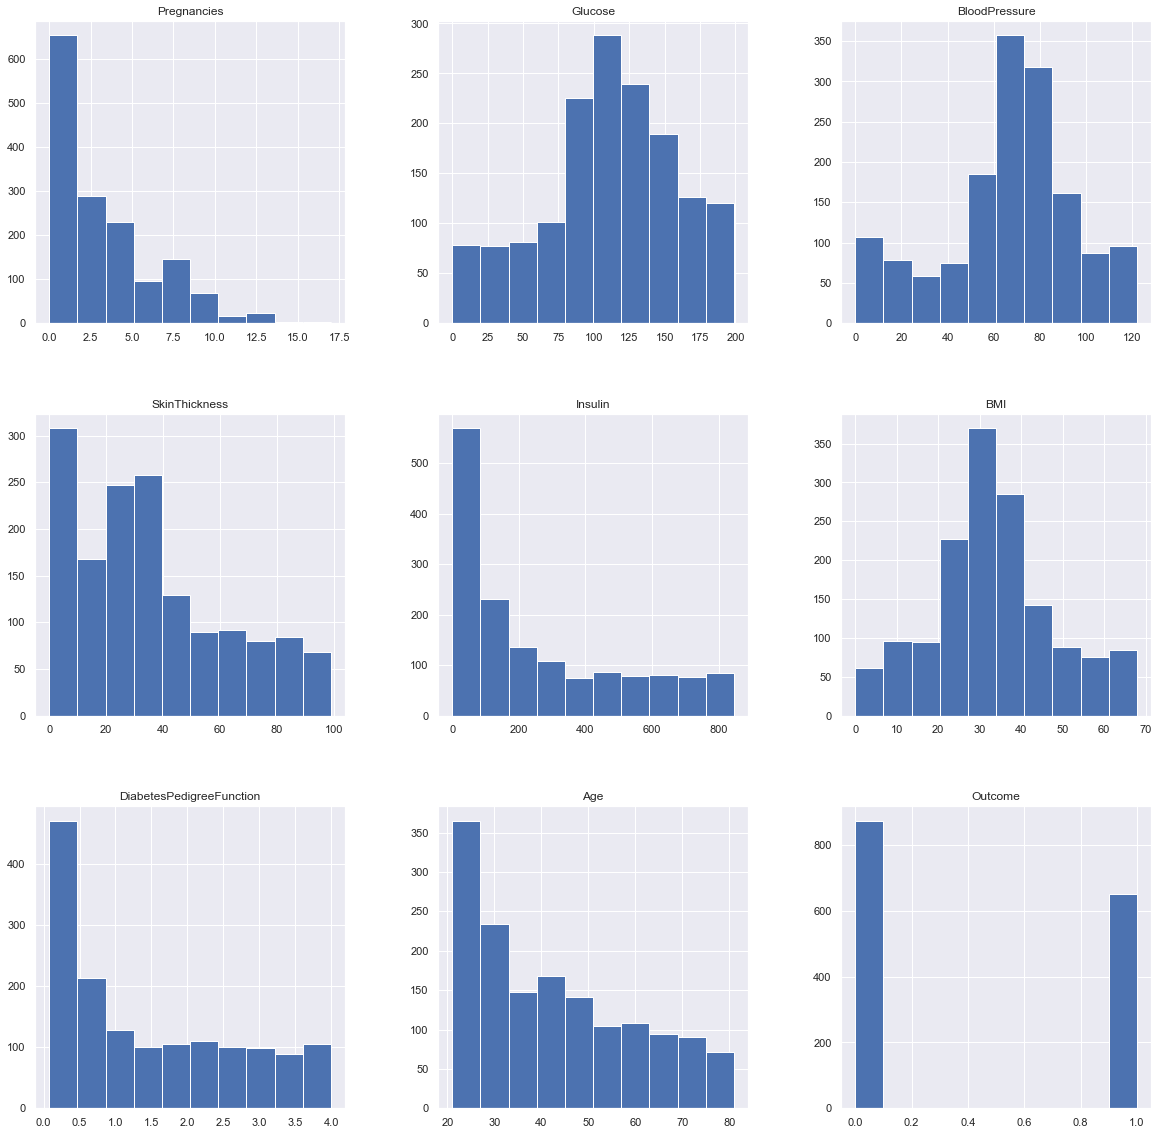

In [11]:
p=diabetes_df.hist(figsize=(20,20))

In [12]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(),inplace=True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(),inplace=True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].mean(),inplace=True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].mean(),inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].mean(),inplace=True)

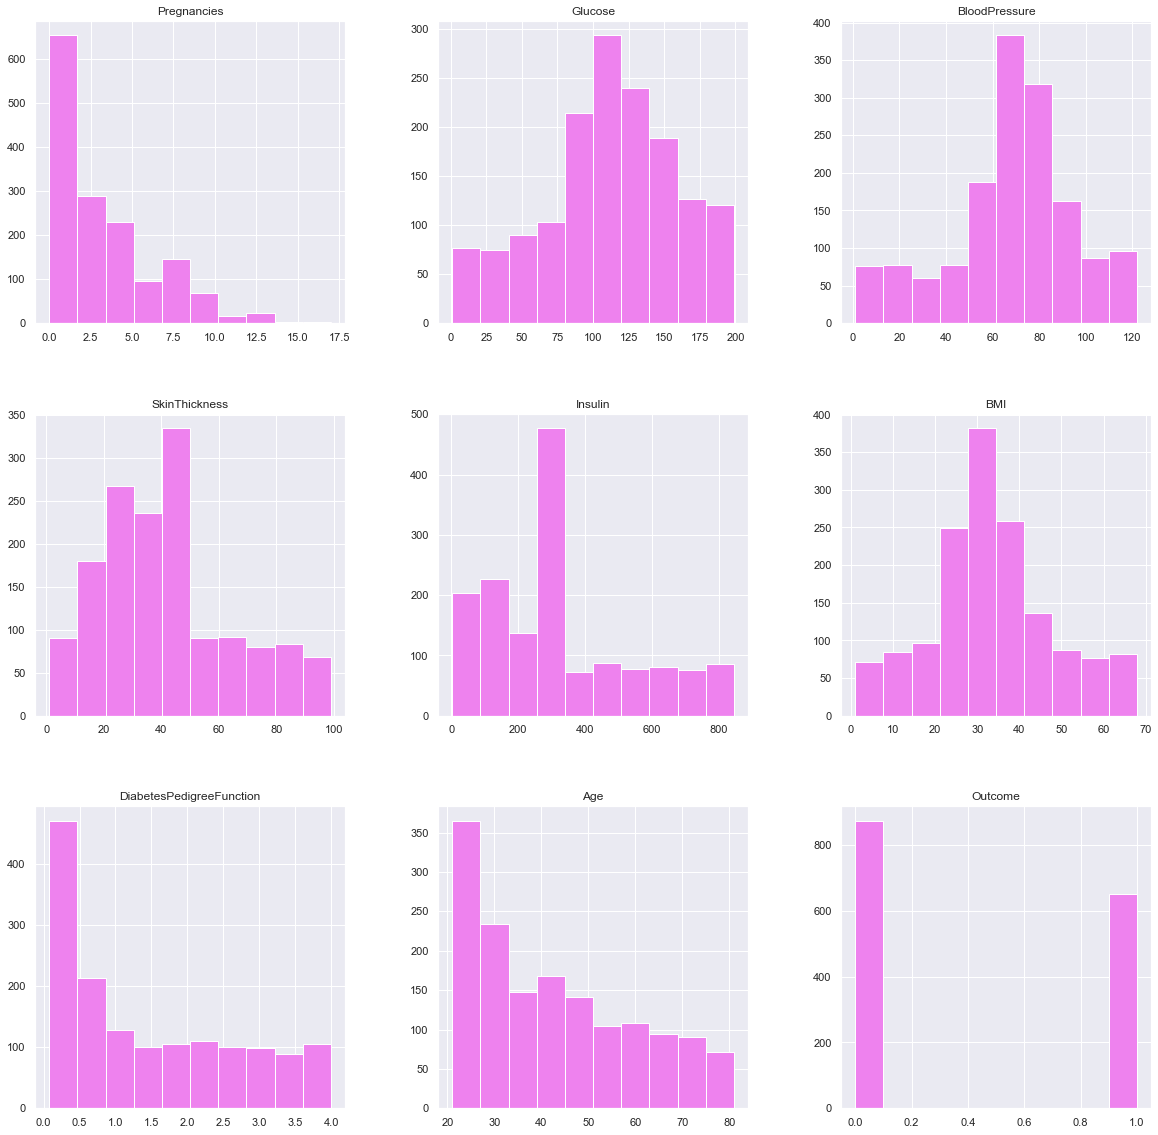

In [17]:
#Plotting diatributions after removing the NAN values

p=diabetes_df_copy.hist(figsize=(20,20),color='violet')

0    873
1    651
Name: Outcome, dtype: int64


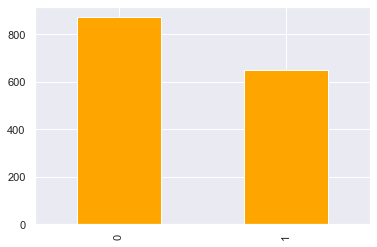

In [18]:
# To check how well the outcome is balanced.

color_wheel={1:"#0392cf",2:"#7bc043"}
colors=diabetes_df["Outcome"].map(lambda x: color_wheel.get(x+1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind='bar',color='orange')

#### From the above visualization it is clear that our dataset is completely imbalanced i.e. no. of pateints who are diabetic are half the patients who are non_diabetic.

(<AxesSubplot:xlabel='Insulin'>, <AxesSubplot:xlabel='Insulin'>)

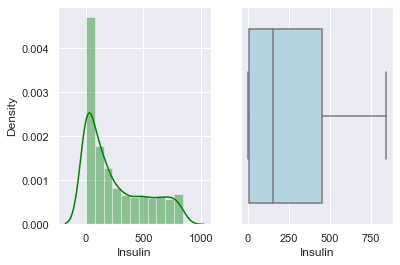

In [19]:
plt.subplot(121),sns.distplot(diabetes_df['Insulin'],color='Green')
plt.subplot(122),sns.boxplot(diabetes_df['Insulin'],color='lightblue')

### CORRELATION BETWEEN ALL THE FEATURES

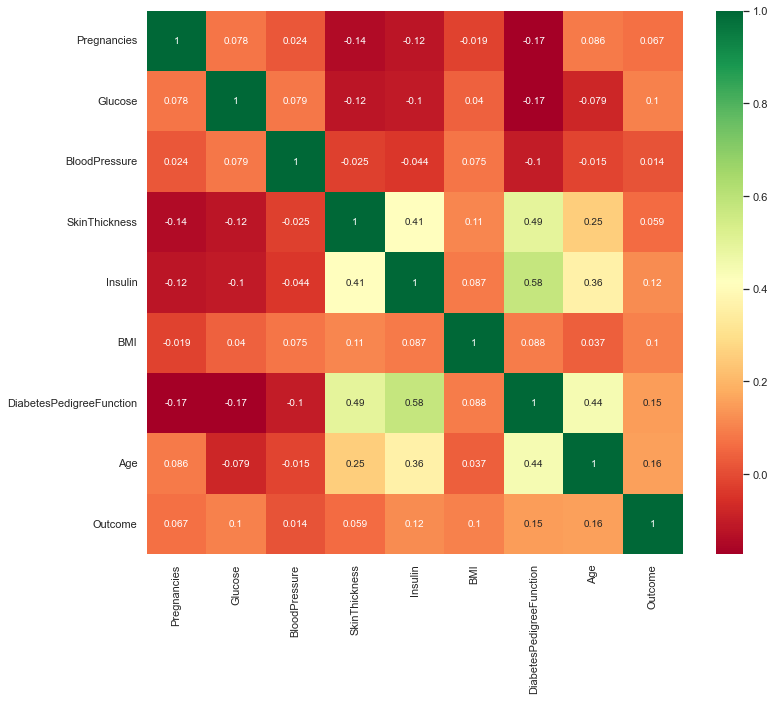

In [20]:
plt.figure(figsize=(12,10))

p=sns.heatmap(diabetes_df.corr(),annot=True,cmap='RdYlGn')

In [21]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,334.633043,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,334.633043,26.6,0.351,31,0
2,8,183.0,64.0,41.550501,334.633043,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [22]:
#After Standard scaling
#all the columns are in same scale which we be useful in ml modle to give better result

sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.882006,0.785142,0.153052,-2.830472e-01,0.000000,0.006538,-0.706843,0.449581
1,-0.685730,-0.557719,-0.071512,-5.423073e-01,0.000000,-0.474322,-0.934808,-0.652431
2,1.509100,1.531176,-0.146366,-3.070256e-16,0.000000,-0.701013,-0.669675,-0.594430
3,-0.685730,-0.472458,-0.071512,-8.015673e-01,-1.105601,-0.371281,-1.086784,-1.232437
4,-0.999277,0.550674,-1.044622,-2.830472e-01,-0.765604,0.659134,0.665072,-0.536429


In [23]:
y=diabetes_df_copy.Outcome
y

0       1
1       0
2       1
3       0
4       1
       ..
1519    0
1520    0
1521    1
1522    0
1523    0
Name: Outcome, Length: 1524, dtype: int64

### MODEL BUILDING

### Splitting the dataset


In [24]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,
                                                    random_state=7)

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
#Getting the accuracy score

from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.6229508196721312


In [28]:
#Confusion matrix gives the summary of prediction results on classification problem
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[114  55]
 [ 60  76]]
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       169
           1       0.58      0.56      0.57       136

    accuracy                           0.62       305
   macro avg       0.62      0.62      0.62       305
weighted avg       0.62      0.62      0.62       305



<AxesSubplot:xlabel='Outcome'>

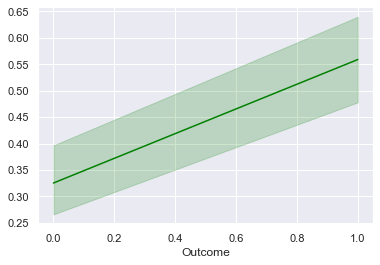

In [30]:
sns.lineplot(y_test,predictions,color='green')